In [1]:
import sys
import os
sys.path.insert(0, os.getcwd()+'/src/')
from myImports import *
%matplotlib inline
%load_ext autoreload

In [2]:
stringSST = "300" ##295, 300 or 305
n_days = 20

#TOOCAN segmentation masks (les labels des objets MCS, dans la grille originale x,y,t)
file_seg='/bdd/MT_WORKSPACE/MCS/RCE/SAM/TOOCAN/TOOCAN_v2022_04/irtb/TOOCAN_2.07_SAM_RCE_large'+stringSST+'_2D_irtb.nc'

# TOOCAN objects (list d'objets MCS, leur labels et leur caractéristiques)
file_tracking='/bdd/MT_WORKSPACE/MCS/RCE/SAM/TOOCAN/TOOCAN_v2022_04/irtb/FileTracking/TOOCAN-SAM_RCE_large'+stringSST+'_2D_irtb.dat.gz'

sam_dir_path = "/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/"

In [8]:
MCS_labels = xr.open_dataarray(file_seg)
MCS_labels = MCS_labels.isel(time=slice(48*n_days))
MCS_labels["latitude"] = MCS_labels["latitude"]
MCS_labels["longitude"] = MCS_labels["longitude"]
MCS_labels["time"] = MCS_labels["time"]
MCS_labels

<xarray.DataArray 'MCS_label' (time: 960, latitude: 128, longitude: 2048)>
[251658240 values with dtype=float64]
Coordinates:
  * latitude   (latitude) int64 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
  * longitude  (longitude) int64 0 1 2 3 4 5 6 ... 2042 2043 2044 2045 2046 2047
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 952 953 954 955 956 957 958 959
Attributes:
    units:           
    standard_name:  MCS_label
    long_name:      MCS labellisation

In [9]:
rcemip = xr.open_dataset(sam_dir_path+"3Dfiles/"+"rcemip_large_2048x128x74_3km_12s_300K_64_0000660150.nc")
rcemip.z

<xarray.DataArray 'z' (z: 74)>
array([   37.,   112.,   194.,   288.,   395.,   520.,   667.,   843.,  1062.,
        1331.,  1664.,  2055.,  2505.,  3000.,  3500.,  4000.,  4500.,  5000.,
        5500.,  6000.,  6500.,  7000.,  7500.,  8000.,  8500.,  9000.,  9500.,
       10000., 10500., 11000., 11500., 12000., 12500., 13000., 13500., 14000.,
       14500., 15000., 15500., 16000., 16500., 17000., 17500., 18000., 18500.,
       19000., 19500., 20000., 20500., 21000., 21500., 22000., 22500., 23000.,
       23500., 24000., 24500., 25000., 25500., 26000., 26500., 27000., 27500.,
       28000., 28500., 29000., 29500., 30000., 30500., 31000., 31500., 32000.,
       32500., 33000.], dtype=float32)
Coordinates:
  * z        (z) float32 37.0 112.0 194.0 288.0 ... 3.2e+04 3.25e+04 3.3e+04
Attributes:
    units:      m
    long_name:  height

In [5]:
#Slices to plot, extracted from extremeRelations.ipynb
Max_coords = np.array([[ 1,  1, 17],[ 2,  2, 57],[ 2,  2, 58],[ 2,  3,  8],[ 5,  2, 17],[ 5,  3,  6],[ 5,  3,  8],[ 6,  3, 60],[17,  0, 16],[17,  0, 36],[18,  1, 22]])
Mean_coords = np.array([[ 0,  0, 32],[ 0,  2, 32],[ 0,  3, 31],[ 0,  3, 32],[ 0,  3, 33],[ 2,  0,  7],[ 2,  0, 15],[ 2,  1, 16],[ 2,  3, 15],[ 4,  3, 33],[12,  3, 33]])

Max_slices = []
for c in Max_coords : 
    t = slice(48*c[0],48*(c[0]+1))
    y = slice(32*c[1],32*(c[1]+1))
    x = slice(32*c[2],32*(c[2]+1))

    Max_slices.append([t,y,x])

Mean_slices = []
for c in Mean_coords : 
    t = slice(48*c[0],48*(c[0]+1))
    y = slice(32*c[1],32*(c[1]+1))
    x = slice(32*c[2],32*(c[2]+1))

    Mean_slices.append([t,y,x])


In [7]:
# unique_labels = []
# for meanSlice, i in zip(Mean_slices, list(range(len(Mean_slices)))):
#     for t in range(48):
#         for label in list(np.unique(MCS_labels.data[meanSlice][~np.isnan(MCS_labels.data[meanSlice])])):
#             if label not in unique_labels : unique_labels.append(label)

# unique_labels = np.unique(MCS_new_labels)
# Create a list of unique colors for each label
#cmap = plt.cm.get_cmap('hsv', len(unique_labels))
norm = Normalize(vmin = 0, vmax = 9)

/scratchx/mcarenso/ipykernel_2704851/1546082984.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.imshow(MCS_labels.data[s]%10, norm =norm,  aspect = 'auto')
/scratchx/mcarenso/ipykernel_2704851/1546082984.py:22: RuntimeWarning: invalid value encountered in remainder
  ax.imshow(MCS_labels.data[s]%10, norm =norm,  aspect = 'auto')
/scratchx/mcarenso/ipykernel_2704851/1546082984.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  check1=MCS_labels.data[s]
/scratchx/mcarenso/ipykernel_2704851/1546082984.py:28: FutureWarning: Using a 

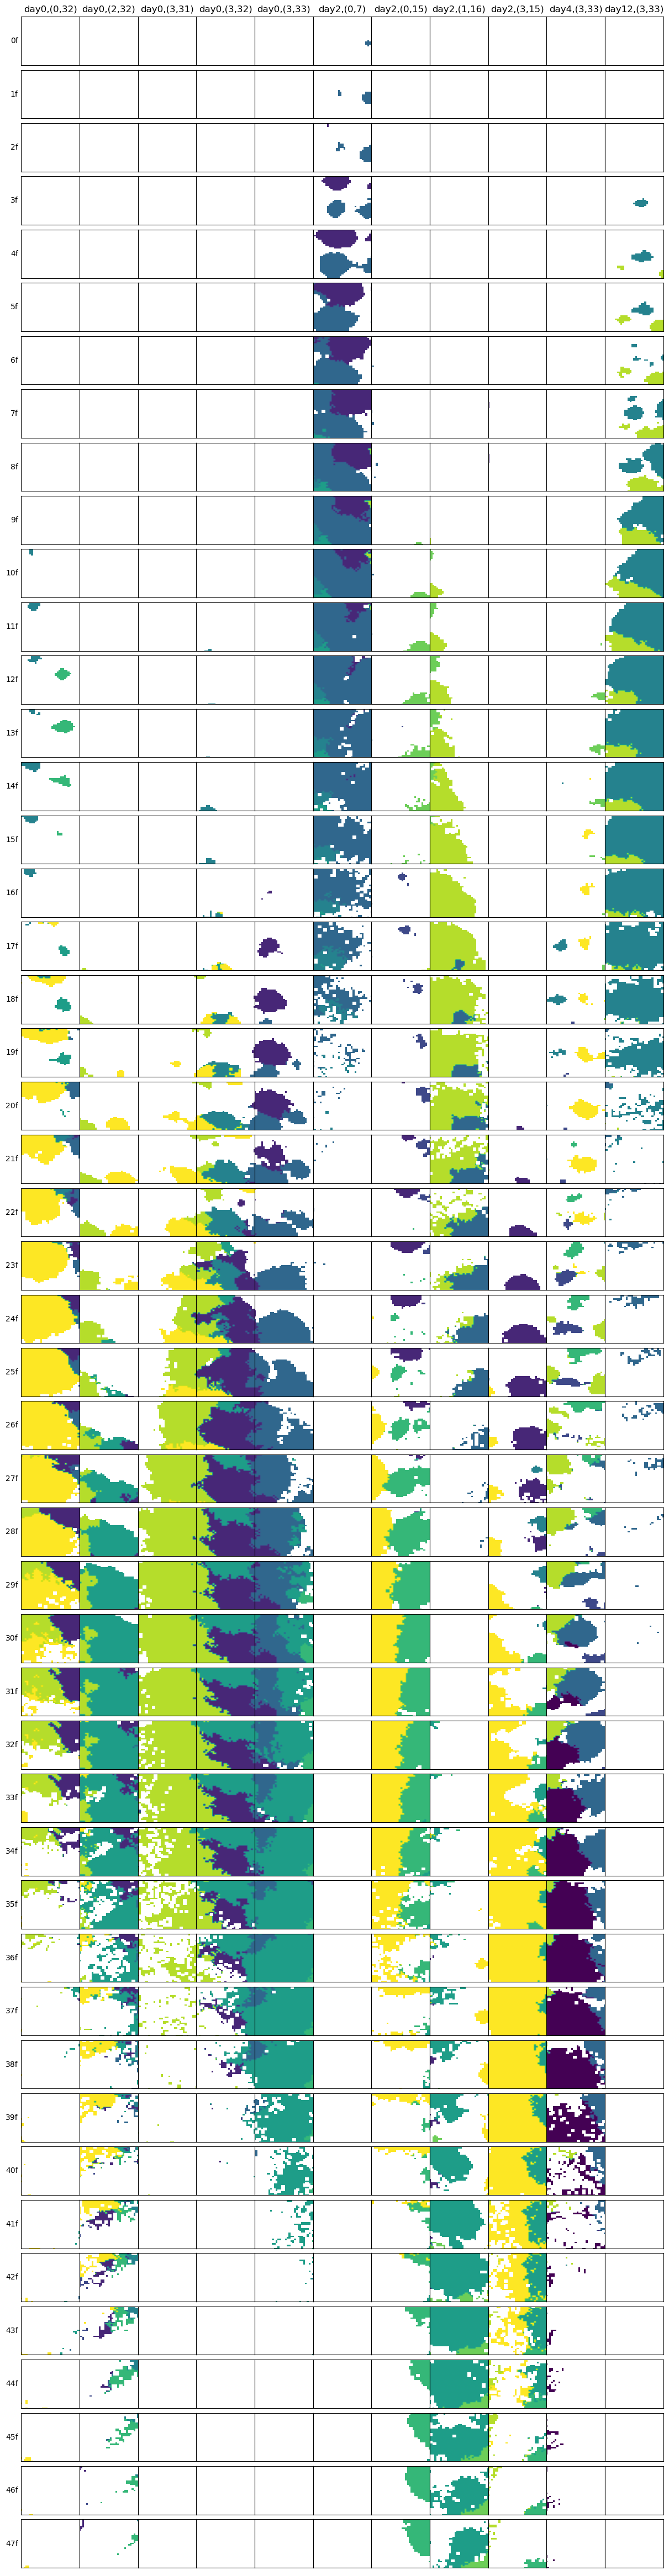

In [10]:
fig, axs = plt.subplots(nrows = 48, ncols = len(Mean_slices), figsize = (15, 60), gridspec_kw={"hspace": 0.1, "wspace": 0})

# Set the y-axis labels for each row of subplots
row_labels = [f"{i}f" for i in range(48)]
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(row_labels[i], rotation=0, va="center", ha="right")

for meanSlice, i in zip(Mean_slices, list(range(len(Mean_slices)))):
    ## offset from original slice
    start=meanSlice[0].start
    # get the ax !
    ax = axs[0,i]
    # Add a title to the subplot with the column number
    ax.set_title(f"day{start//48},({meanSlice[1].start//32},{meanSlice[2].start//32})")
    # Move the title up slightly to avoid overlapping with the main title
    ax.title.set_position([0.5, 1.05])

    for t in range(48):
        ax = axs[t, i]
        frame = start+t
        s = [frame, meanSlice[1], meanSlice[2]]
        ax.imshow(MCS_labels.data[s]%10, norm =norm,  aspect = 'auto')

        if t == 34 and i  == 2 :
            check1=MCS_labels.data[s]

        if t == 35 and i  == 2 :
            check2=MCS_labels.data[s]

        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [11]:
# unique_labels = []
# for maxSlice, i in zip(Max_slices, list(range(len(Mean_slices)))):
#     for t in range(48):
#         for label in list(np.unique(MCS_labels.data[maxSlice][~np.isnan(MCS_labels.data[maxSlice])])):
#             if label not in unique_labels : unique_labels.append(label)

# unique_labels = np.unique(MCS_new_labels)
# Create a list of unique colors for each label

/scratchx/mcarenso/ipykernel_2704851/3041535560.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.imshow(MCS_labels.data[s]%10, norm = norm, aspect = 'auto')
/scratchx/mcarenso/ipykernel_2704851/3041535560.py:22: RuntimeWarning: invalid value encountered in remainder
  ax.imshow(MCS_labels.data[s]%10, norm = norm, aspect = 'auto')
/scratchx/mcarenso/ipykernel_2704851/3041535560.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


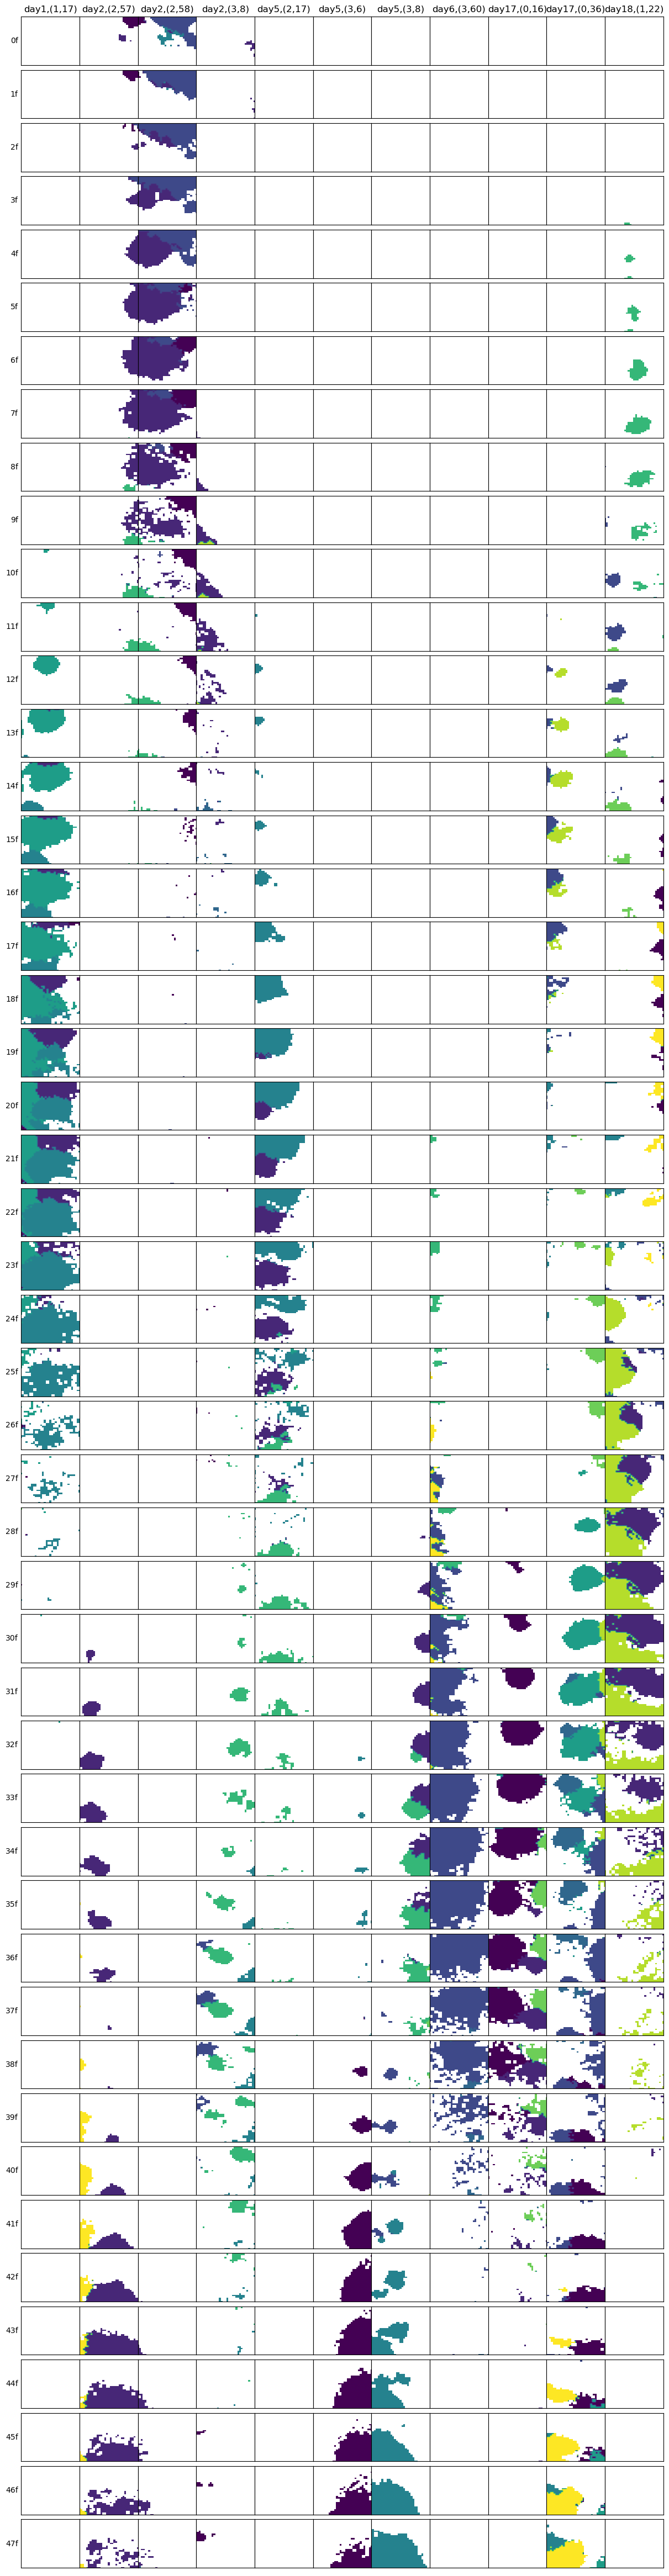

In [13]:
fig, axs = plt.subplots(nrows = 48, ncols = len(Max_slices), figsize = (15, 60), gridspec_kw={"hspace": 0.1, "wspace": 0})

# Set the y-axis labels for each row of subplots
row_labels = [f"{i}f" for i in range(48)]
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(row_labels[i], rotation=0, va="center", ha="right")

for maxSlice, i in zip(Max_slices, list(range(len(Max_slices)))):
    ## offset from original slice
    start=maxSlice[0].start
    # get the ax !
    ax = axs[0,i]
    # Add a title to the subplot with the column number
    ax.set_title(f"day{start//48},({maxSlice[1].start//32},{maxSlice[2].start//32})")
    # Move the title up slightly to avoid overlapping with the main title
    ax.title.set_position([0.5, 1.05])

    for t in range(48):
        ax = axs[t, i]
        frame = start+t
        s = [frame, maxSlice[1], maxSlice[2]]
        ax.imshow(MCS_labels.data[s]%10, norm = norm, aspect = 'auto')

        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [9]:
print("Goodbye world !")

Goodbye world !
